In [1]:
from math import sqrt
from scipy import stats

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

---
# Variance & Standard Deviation

In [2]:
example_one = np.array([-10, 0, 10, 20, 30])
example_one

array([-10,   0,  10,  20,  30])

In [3]:
example_one.mean()

10.0

In [4]:
example_two = np.array([8, 9, 10, 11, 12])
example_two

array([ 8,  9, 10, 11, 12])

In [5]:
example_two.mean()

10.0

In [6]:
# numpy variance
example_one.var()

200.0

In [7]:
# numpy variance
example_two.var()

2.0

In [8]:
# manually calculating variance for example_one
((example_one[0] - example_one.mean()) ** 2 + (example_one[1] - example_one.mean()) ** 2 + (example_one[2] - example_one.mean()) ** 2 + (example_one[3] - example_one.mean()) ** 2 + (example_one[4] - example_one.mean()) ** 2) / len(example_one)

200.0

In [9]:
# manually calculating variance for example_two
((example_two[0] - example_two.mean()) ** 2 + (example_two[1] - example_two.mean()) ** 2 + (example_two[2] - example_two.mean()) ** 2 + (example_two[3] - example_two.mean()) ** 2 + (example_two[4] - example_two.mean()) ** 2) / len(example_two)


2.0

In [10]:
# manually calculating standard deviation for example_one
sqrt(((example_one[0] - example_one.mean()) ** 2 + (example_one[1] - example_one.mean()) ** 2 + (example_one[2] - example_one.mean()) ** 2 + (example_one[3] - example_one.mean()) ** 2 + (example_one[4] - example_one.mean()) ** 2) / len(example_one))

14.142135623730951

In [11]:
# manually calculating standard deviation for example_two
sqrt(((example_two[0] - example_two.mean()) ** 2 + (example_two[1] - example_two.mean()) ** 2 + (example_two[2] - example_two.mean()) ** 2 + (example_two[3] - example_two.mean()) ** 2 + (example_two[4] - example_two.mean()) ** 2) / len(example_two))

1.4142135623730951

---
# Simulation Exercises

#### 1. How likely is it that you roll doubles when rolling two dice?

In [12]:
# represent your data
# create a matrix
n_simulations = 10_000
n_trials = 2 # dice

dice_rolls = pd.DataFrame(np.random.choice(range(1,7), size=(n_simulations, n_trials)))
dice_rolls

,0,1
0,1,3
1,2,2
2,4,5
3,2,5
4,2,4
...,...,...
9995,6,4
9996,1,4
9997,5,3
9998,3,1


In [13]:
# aggregate by row
dice_rolls["doubles"] = dice_rolls[0] == dice_rolls[1]
dice_rolls

,0,1,doubles
0,1,3,False
1,2,2,True
2,4,5,False
3,2,5,False
4,2,4,False
...,...,...,...
9995,6,4,False
9996,1,4,False
9997,5,3,False
9998,3,1,False


In [14]:
# aggregate for probability
(dice_rolls["doubles"] == True).mean()

0.1609

#### 2. If you flip 8 coins, what is the probability of getting exactly 3 heads?

In [15]:
# represent your data
# create a matrix
n_simulations = 10_000
n_trials = 8 # coins

# 0 represents tails; 1 represents heads
coin_flips = pd.DataFrame(np.random.choice([0, 1], size=(n_simulations, n_trials)))
coin_flips

,0,1,2,3,4,5,6,7
0,0,1,1,0,1,1,0,1
1,1,0,1,0,1,0,1,1
2,0,0,0,0,1,0,1,1
3,0,1,1,1,0,1,0,0
4,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...
9995,0,1,0,0,1,0,0,0
9996,0,0,0,0,0,0,1,0
9997,0,0,1,0,0,1,1,0
9998,1,0,1,0,1,1,1,1


In [16]:
# aggregate by row
coin_flips["total_heads"] = coin_flips.sum(axis=1)
coin_flips

,0,1,2,3,4,5,6,7,total_heads
0,0,1,1,0,1,1,0,1,5
1,1,0,1,0,1,0,1,1,5
2,0,0,0,0,1,0,1,1,3
3,0,1,1,1,0,1,0,0,4
4,1,1,0,0,1,1,0,1,5
...,...,...,...,...,...,...,...,...,...
9995,0,1,0,0,1,0,0,0,2
9996,0,0,0,0,0,0,1,0,1
9997,0,0,1,0,0,1,1,0,3
9998,1,0,1,0,1,1,1,1,6


In [17]:
# aggregate for probability
(coin_flips["total_heads"] == 3).mean()

0.2194

#### If you flip 8 coins, what is the probability of getting more than 3 heads?

In [18]:
# aggregate for probability
(coin_flips["total_heads"] > 3).mean()

0.6362

#### 3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [19]:
# represent data
# create matrix
n_simulations = 10_000
n_trials = 2 # billboards

# 0 represents web dev students; 1 represents data sci students
billboards = pd.DataFrame(np.random.choice([0, 1], size=(n_simulations, n_trials), p=[3/4, 1/4]))
billboards

,0,1
0,0,0
1,1,1
2,0,1
3,1,0
4,1,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,0,0


In [20]:
# aggregate by row
billboards["total_data_sci"] = billboards.sum(axis=1)
billboards

,0,1,total_data_sci
0,0,0,0
1,1,1,2
2,0,1,1
3,1,0,1
4,1,1,2
...,...,...,...
9995,0,0,0
9996,0,0,0
9997,0,0,0
9998,0,0,0


In [21]:
# aggregate for probability
(billboards["total_data_sci"] == 2).mean()

0.064

#### 4. Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon?

In [22]:
# represent data
# create matrix
mean = 3
std = 1.5
n_simulations = 10_000
n_trials = 5 # weekdays

poptarts = np.round(np.random.normal(mean, std, size=(n_simulations, n_trials)))
poptarts

array([[ 2.,  0.,  4.,  3.,  3.],
       [ 3.,  3.,  2.,  3.,  1.],
       [ 2.,  3., -0.,  3.,  1.],
       ...,
       [ 0.,  4.,  4.,  3.,  5.],
       [ 4.,  5.,  4.,  3.,  2.],
       [ 3.,  2.,  3.,  5.,  4.]])

In [23]:
poptarts = pd.DataFrame(poptarts)
poptarts

,0,1,2,3,4
0,2.0,0.0,4.0,3.0,3.0
1,3.0,3.0,2.0,3.0,1.0
2,2.0,3.0,-0.0,3.0,1.0
3,5.0,3.0,4.0,3.0,4.0
4,1.0,1.0,6.0,3.0,2.0
...,...,...,...,...,...
9995,3.0,5.0,3.0,3.0,6.0
9996,2.0,4.0,4.0,6.0,2.0
9997,0.0,4.0,4.0,3.0,5.0
9998,4.0,5.0,4.0,3.0,2.0


In [24]:
poptarts = pd.DataFrame(np.where(poptarts < 0, 0, poptarts))
poptarts

,0,1,2,3,4
0,2.0,0.0,4.0,3.0,3.0
1,3.0,3.0,2.0,3.0,1.0
2,2.0,3.0,-0.0,3.0,1.0
3,5.0,3.0,4.0,3.0,4.0
4,1.0,1.0,6.0,3.0,2.0
...,...,...,...,...,...
9995,3.0,5.0,3.0,3.0,6.0
9996,2.0,4.0,4.0,6.0,2.0
9997,0.0,4.0,4.0,3.0,5.0
9998,4.0,5.0,4.0,3.0,2.0


In [25]:
# aggregate by row
poptarts["weekly_consumption"] = poptarts.sum(axis=1)
poptarts

,0,1,2,3,4,weekly_consumption
0,2.0,0.0,4.0,3.0,3.0,12.0
1,3.0,3.0,2.0,3.0,1.0,12.0
2,2.0,3.0,-0.0,3.0,1.0,9.0
3,5.0,3.0,4.0,3.0,4.0,19.0
4,1.0,1.0,6.0,3.0,2.0,13.0
...,...,...,...,...,...,...
9995,3.0,5.0,3.0,3.0,6.0,20.0
9996,2.0,4.0,4.0,6.0,2.0,18.0
9997,0.0,4.0,4.0,3.0,5.0,16.0
9998,4.0,5.0,4.0,3.0,2.0,18.0


In [26]:
# aggregate for probabilty
(poptarts["weekly_consumption"] < 17).mean()

0.6663

#### Exercise 5
5. Compare Heights:
    - Men have an average height of 178 cm and standard deviation of 8cm.
    - Women have a mean of 170, sd = 6cm.
    - If a man and woman are chosen at random, P(woman taller than man)?

In [27]:
# represent data
m_mean = 178
m_std = 8

f_mean = 170
f_std = 6

# create matrices
n_simulations = 10_000

men = pd.DataFrame(np.random.normal(m_mean, m_std, size=(n_simulations)))
women = pd.DataFrame(np.random.normal(f_mean, f_std, size=(n_simulations)))

# aggregate by row
women > men

# aggregate for probability
(women > men).mean()

0    0.2114
dtype: float64

#### 6. When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue?

In [28]:
# represent data
# create matrix
n_simulations = 10_000
n_trials = 50 # students

# 0 is fail; 1 is pass
conda_dls = pd.DataFrame(np.random.choice([0, 1], size=(n_simulations, n_trials), p=[1/250, 249/250]))
conda_dls

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9996,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9997,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9998,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [29]:
# aggregate by row
conda_dls["total_dls"] = conda_dls.sum(axis=1)
conda_dls

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,total_dls
0,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,49
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
9996,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
9997,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
9998,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,49


In [30]:
# aggregate for probability
(conda_dls["total_dls"] == 50).mean()

0.8195

#### 7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

In [31]:
# represent data
# create matrix
n_simulations = 10_000
n_trials = 3 # three days

# 0 is no food trucks; 1 is food trucks
food_trucks = pd.DataFrame(np.random.choice([0, 1], size=(n_simulations, n_trials), p=[.3, .7]))
food_trucks

,0,1,2
0,1,1,1
1,1,1,1
2,1,1,0
3,0,0,1
4,0,0,1
...,...,...,...
9995,1,0,1
9996,1,0,0
9997,1,1,1
9998,0,1,1


In [32]:
# aggregate by row
food_trucks["total_trucks_over_three_days"] = food_trucks.sum(axis=1)
food_trucks

,0,1,2,total_trucks_over_three_days
0,1,1,1,3
1,1,1,1,3
2,1,1,0,2
3,0,0,1,1
4,0,0,1,1
...,...,...,...,...
9995,1,0,1,2
9996,1,0,0,1
9997,1,1,1,3
9998,0,1,1,2


In [33]:
# aggregate for probability
(food_trucks["total_trucks_over_three_days"] == 0).mean()

0.0267

#### 8. If 23 people are in the same room, what are the odds that two of them share a birthday?

In [34]:
# represent data
# create matrix
n_simulations = 10_000
n_trials = 23 # people

birthdays = pd.DataFrame(np.random.choice(range(0, 365), size=(n_simulations, n_trials)))
birthdays

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,184,7,3,115,312,41,22,274,47,73,...,309,249,196,59,60,85,351,342,338,291
1,51,290,271,301,19,137,70,147,120,127,...,106,205,186,321,156,308,35,217,145,5
2,195,91,327,203,51,96,33,249,71,353,...,166,35,256,39,355,347,94,23,249,249
3,313,199,134,214,39,269,14,223,210,191,...,363,160,216,228,257,187,330,262,134,209
4,325,242,326,131,282,274,217,300,357,227,...,80,297,13,360,103,190,98,222,275,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,83,289,293,21,254,46,253,105,205,324,...,14,285,15,181,208,101,350,23,112,163
9996,200,144,197,331,187,267,119,146,223,319,...,8,290,297,206,121,189,232,32,117,234
9997,315,147,44,96,120,303,295,207,306,352,...,119,131,288,35,362,65,134,11,168,193
9998,38,138,100,266,192,126,193,264,227,206,...,127,191,2,247,5,314,328,40,298,268


In [35]:
# aggregate by row
birthdays["unique_birthdays"] = birthdays.nunique(axis=1)
birthdays

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,unique_birthdays
0,184,7,3,115,312,41,22,274,47,73,...,249,196,59,60,85,351,342,338,291,23
1,51,290,271,301,19,137,70,147,120,127,...,205,186,321,156,308,35,217,145,5,23
2,195,91,327,203,51,96,33,249,71,353,...,35,256,39,355,347,94,23,249,249,21
3,313,199,134,214,39,269,14,223,210,191,...,160,216,228,257,187,330,262,134,209,22
4,325,242,326,131,282,274,217,300,357,227,...,297,13,360,103,190,98,222,275,128,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,83,289,293,21,254,46,253,105,205,324,...,285,15,181,208,101,350,23,112,163,23
9996,200,144,197,331,187,267,119,146,223,319,...,290,297,206,121,189,232,32,117,234,23
9997,315,147,44,96,120,303,295,207,306,352,...,131,288,35,362,65,134,11,168,193,23
9998,38,138,100,266,192,126,193,264,227,206,...,191,2,247,5,314,328,40,298,268,23


In [36]:
# aggregate for probability
(birthdays["unique_birthdays"] < 23).mean()

0.5063

---
# Probability Distributions

### Uniform Distribution

In [37]:
die_distribution = stats.randint(1, 7)

In [38]:
die_distribution

#### scipy functions for distributions

In [39]:
# .rvs() no argument = single randint
die_distribution.rvs()

5

In [40]:
# .rvs singular int = quantity of int randints
die_distribution.rvs(5)

array([2, 5, 6, 3, 1])

In [41]:
# .rvs tuple = martix of randints
die_distribution.rvs((5,6)) # five rows, six columns

array([[6, 5, 3, 6, 2, 2],
       [2, 1, 2, 6, 3, 3],
       [5, 6, 2, 6, 4, 4],
       [6, 4, 4, 2, 4, 2],
       [6, 6, 1, 6, 3, 6]])

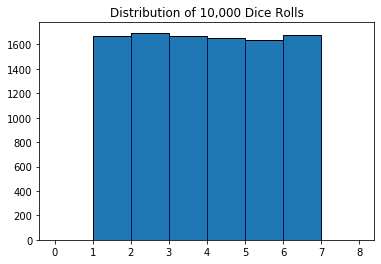

In [42]:
# using random values to visualize a distribution
n = 10_000

x = die_distribution.rvs(n)

plt.hist(x, bins=range(0,9), edgecolor="black")
plt.title("Distribution of 10,000 Dice Rolls")
plt.show()

In [43]:
# .pmf - probability mass function - for discrete variables
# singular probability mass (percent chance) of discrete outcome
die_distribution.pmf(4)

0.16666666666666666

In [44]:
die_distribution.pmf([1, 3, 6])

array([0.16666667, 0.16666667, 0.16666667])

In [45]:
# .pdf - probability density function - for continuious variables


In [46]:
# .cdf - cumulative density function
# likelihood of certain outcome or all the results below it (i.e., <= )
die_distribution.cdf(4)

0.6666666666666666

In [47]:
# .ppf - percent point function - aka quantile function
# inverse of .cdf
# accepts a probability and returns the value associated with that probability
die_distribution.ppf(5/6)

5.0

In [48]:
# .sf - survival function - probability of a random variable taking on a value greater than a given point (i.e., > )
# what is the likelihood we roll greater than a 5 (i.e., 6 )
die_distribution.sf(5)

0.16666666666666663

In [49]:
# .isf - inverse survival function - returns a value given a probability
print(die_distribution.isf(.5))
print(die_distribution.isf(4/6))

3.0
2.0


### Binomial Distribution

>You are taking a multiple choice test consisting of 30 questions that you forgot to study for. Each question has 4 possible answers and you will choose one at random. What is the probability you get more than 10 of the questions right?

In [50]:
n = 30 # questions; trials
p = .25 # four choices for each question

stats.binom(n, p).pmf(10)

0.09086524035782864

In [51]:
stats.binom(n, p).sf(10)

0.10572812269266013

> A binomial distribution with an n of 1 is referred to as a Bernoulli Distribution.

### Normal Distribution

Allows us to model a continuous random variable where the further away from the mean the less likely the outcome. Commonly referred to as a "bell curve"

Defined by mean and standard deviation. The **standard normal distribution** is a normal distribution with a mean of 0 and a standard deviation of 1

> Suppose that a store's daily sales are normally distributed with a mean of 12,000 dollars and standard deviation of 2000 dollars. How much would the daily sales have to be to be in the top 10% of all days?

In [52]:
mean = 12_000
std = 2_000

stats.norm(mean, std).isf(.10) # top 10 percent

14563.103131089201

In [53]:
stats.norm(mean, std).ppf(.9) # 90th percentile

14563.103131089201

> How likely is it that the store sells less than 10,000 dollars one day?

In [54]:
stats.norm(mean, std).cdf(10_000)

0.15865525393145707

### Poisson Distribution

> Codeup knows that, on average, students consume 5 lbs of coffee per week. How likely is it that the coffee consumption for this week is only 3 lbs?

In [55]:
stats.poisson(5).pmf(3)

0.1403738958142805

In [56]:
# more than 7 lbs
stats.poisson(5).sf(7)

0.13337167407000744

### Exercises

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

    - What is the probability that no cars drive up in the noon hour?
    - What is the probability that 3 or more cars come through the drive through?
    - How likely is it that the drive through gets at least 1 car?

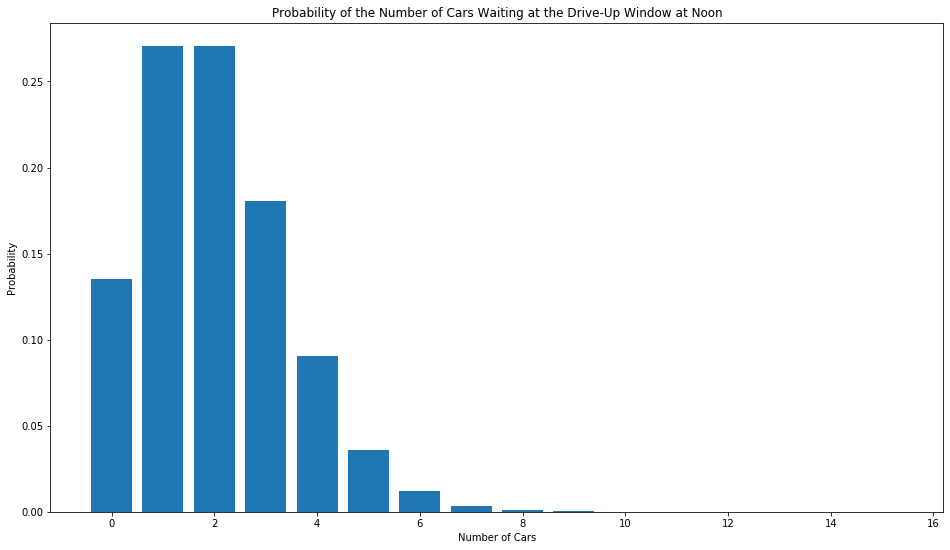

In [57]:
mean = 2

x = range(16)
y = stats.poisson(mean).pmf(x)

plt.figure(figsize=(16,9))
plt.bar(x, y)
plt.title("Probability of the Number of Cars Waiting at the Drive-Up Window at Noon")
plt.xlabel("Number of Cars")
plt.ylabel("Probability")
plt.show()

In [58]:
# What is the probability that no cars drive up in the noon hour?
mean = 2

n_simulations = 10_000

simulation = (np.random.poisson(mean, size=(n_simulations)) == 0).mean() # simulation
theoretical = stats.poisson(mean).pmf(0) # theoretical

simulation, theoretical

(0.1332, 0.1353352832366127)

In [59]:
# What is the probability that 3 or more cars come through the drive through?
mean = 2

n_simulations = 10_000

simulation = (np.random.poisson(mean, size=(n_simulations)) >= 3).mean() # simulation
theoretical = stats.poisson(mean).sf(2) # theoretical

simulation, theoretical

(0.3246, 0.32332358381693654)

In [60]:
# How likely is it that the drive through gets at least 1 car?
mean = 2

n_simulations = 10_000

simulation = (np.random.poisson(mean, size=(n_simulations)) > 0).mean() # simulation
theoretical = stats.poisson(mean).sf(0) # theoretical

simulation, theoretical

(0.8628, 0.8646647167633873)

2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

    - What grade point average is required to be in the top 5% of the graduating class?
    - What GPA constitutes the bottom 15% of the class?
    - An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
    - If I have a GPA of 3.5, what percentile am I in?

In [61]:
# What grade point average is required to be in the top 5% of the graduating class?
mean = 3.0
std = .3

n_simulations = 10_000

simulation = np.percentile(np.random.normal(mean, std, size=(n_simulations)), 95)
theoretical = stats.norm(mean, std).isf(.05)
              
simulation, theoretical

(3.491521952021771, 3.4934560880854417)

In [62]:
# What GPA constitutes the bottom 15% of the class?
mean = 3.0
std = .3

n_simulations = 10_000

simulation = np.percentile(np.random.normal(mean, std, size=(n_simulations)), 15)
theoretical = stats.norm(mean, std).isf(.85)

simulation, theoretical

(2.6885459853379636, 2.689069983151863)

In [88]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class.
# Determine the range of the third decile.
mean = 3.0
std = .3

n_simulations = 10_000

simulation = np.random.normal(mean, std, size=(n_simulations))
theoretical = stats.norm(mean, std)

simulated_first_decile = np.percentile(simulation, 10)
simulated_second_decile = np.percentile(simulation, 20)
simulated_third_decile = np.percentile(simulation, 30)

theoretical_first_decile = theoretical.ppf(.1)
theoretical_second_decile = theoretical.ppf(.2)
theoretical_third_decile = theoretical.ppf(.3)

print(f"""The simulated range of the third decile is {simulated_second_decile} to {simulated_third_decile}.
The theoretical range of the third decile is {theoretical_second_decile} to {theoretical_third_decile}.""")

The simulated range of the third decile is 2.7434701578249445 to 2.8364153472803624.
The theoretical range of the third decile is 2.7475136299281258 to 2.842679846187588.


In [86]:
# Would a student with a 2.8 grade point average qualify for this scholarship in a simulated experiment?
student_gpa = 2.8

if student_gpa >= simulated_second_decile and student_gpa <= simulated_third_decile:
    print(f"A student with a {student_gpa} GPA would qualify for the scholarship in a simulated experiment.")
else:
    print(f"A student with a {student_gpa} GPA would not qualify for the scholarship in a simulated experiment.")

A student with a 2.8 GPA would qualify for the scholarship in a simulated experiment.


In [87]:
# Theoretically, would a student with a 2.8 grade point average qualify for this scholarship?
student_gpa = 2.8

if student_gpa >= theoretical_second_decile and student_gpa <= theoretical_third_decile:
    print(f"Theoretically, a student with a {student_gpa} GPA would qualify for the scholarship.")
else:
    print(f"Theoretically, a student with a {student_gpa} GPA would not qualify for the scholarship.")

Theoretically, a student with a 2.8 GPA would qualify for the scholarship.


In [91]:
# If I have a GPA of 3.5, what percentile am I in?
mean = 3.0
std = .3

n_simulations = 10_000

simulation = (np.random.normal(mean, std, size=(n_simulations)) >= 3.5).mean()
theoretical = stats.norm(mean, std).sf(3.5)

simulation, theoretical

(0.05, 0.0477903522728147)

3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [84]:
n = 4_326 # visitors
p = .02 # average click-through rate

n_simulations = 10_000

simulation = (np.random.binomial(n, p, size=(n_simulations)) >= 97).mean()
theoretical = stats.binom(n, p).sf(96)

simulation, theoretical

(0.1377, 0.1397582363130086)